# Case study on Supervised learning
## Iris Dataset:
### The Iris Dataset contains four features (length and width of sepals and petals) of a total of 150 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Keywords used in data:

* SW : Sepal Width
* SL : Sepal Length
* PW : Petal Width
* PL : Petal Lenght
#### Do the following in the iris dataset.

1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## 1.Read the dataset to the python environment

In [3]:
data=pd.read_excel(r"D:\activity\iris (2).xls")

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

1. While reading the data set, we can see that there are 5 features and 150 samples.
2. In SL,SW,PL features, there are 7,6 & 6 null/ missing values are present respectively.
3. Except Classification feature (which is object type) all others are of float64 data type.
4. It contain 3 Classifications: Iris-versicolor, Iris-virginica, Iris-setosa

### 2.Do necessary pre-processing steps

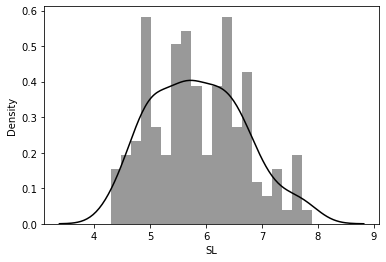

In [9]:
sns.distplot(data['SL'],kde=True,bins=20,color='black')
plt.show()

<AxesSubplot:xlabel='SW', ylabel='Density'>

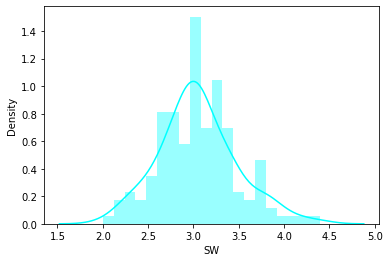

In [10]:
sns.distplot(data['SW'],color='cyan',bins=20)

<AxesSubplot:xlabel='PL', ylabel='Density'>

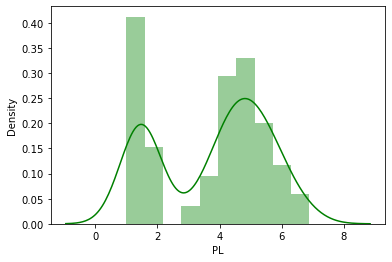

In [12]:
sns.distplot(data['PL'],color='green',bins=10)

In [52]:
df=pd.DataFrame(data)
#from the distribution plot it is clear that SW is normally distributed, so we can use mean
# And the other two can be filled with median

data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('median'))
# another method : df['SL']=df.groupby('Classification')['SL'].apply(lambda x:x.fillna(x.median()))

data['SW'] = data['SW'].fillna(data.groupby('Classification')['SW'].transform('mean'))
# another method : df['SW']=df.groupby('Classification')['SW'].apply(lambda x:x.fillna(x.median()))

data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))
# another method : df['PL']=df.groupby('Classification')['PL'].apply(lambda x:x.fillna(x.median()))

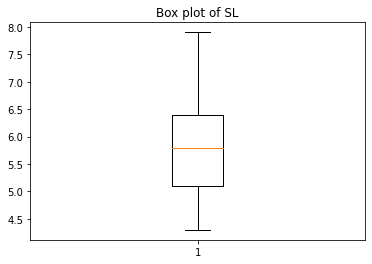

In [53]:
plt.boxplot(df['SL'])
plt.title('Box plot of SL')
plt.show()

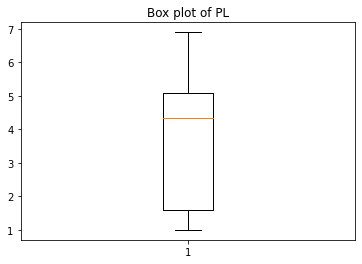

In [54]:
plt.boxplot(df['PL'])
plt.title('Box plot of PL')
plt.show()

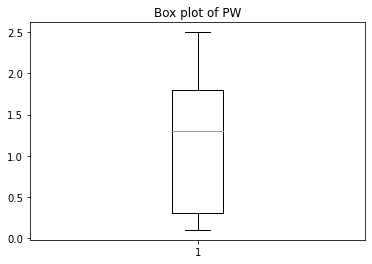

In [45]:
plt.boxplot(df['PW'])
plt.title('Box plot of PW')
plt.show()

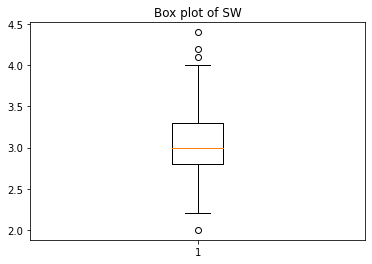

In [44]:
plt.boxplot(df['SW'])
plt.title('Box plot of SW')
plt.show()

In [46]:
## the SW column has outliers,so clearing outliers
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 2.8
The Q2 value: 3.0
The Q3 value: 3.3
The values below 2.05 and above 4.05 are outliers.


In [47]:
outlier=[]
for x in df["SW"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in SW feature')
print('Outliers are:',outlier)
ind1,ind2=df['SW'] > up_lim,df['SW'] < low_lim
i1=df.loc[ind1].index
i2=df.loc[ind2].index
print('The index values of the outliers which are above upper limit:',i1,'\n')
print('The Index values of the outliers which are below lower limit:',i2)

There are 4 outliers in SW feature
Outliers are: [4.4, 4.1, 4.2, 2.0]
The index values of the outliers which are above upper limit: Int64Index([15, 32, 33], dtype='int64') 

The Index values of the outliers which are below lower limit: Int64Index([60], dtype='int64')


In [55]:
df.drop([15, 32, 33,60],inplace=True)

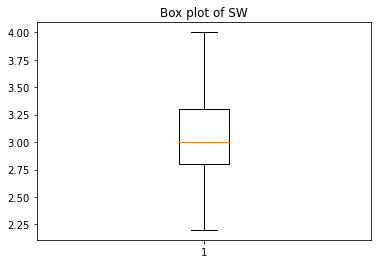

In [57]:
plt.boxplot(df['SW'])
plt.title('Box plot of SW')
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              146 non-null    float64
 1   SW              146 non-null    float64
 2   PL              146 non-null    float64
 3   PW              146 non-null    float64
 4   Classification  146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [59]:
#Splitting the data set into target and features
x=df.drop(['Classification'],axis=1) 
y=pd.DataFrame(df['Classification'])

In [60]:
# Classification feature (target) is object type. we want to convert it into numerical
# Since it is the target column, so inorder to avoid multiple column we can perform label enconding.

from sklearn.preprocessing import LabelEncoder

label_en=LabelEncoder()
a=['Classification']

for i in np.arange(len(a)): # we are doing labelling for each entries of Classification
    y[a[i]]=label_en.fit_transform(y[a[i]])

In [61]:
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [62]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.0,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,5.55,2.0
148,6.2,3.4,5.40,2.3


## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [63]:
from sklearn.model_selection import train_test_split

# Spliting the dataset for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Model 1: Logisitic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

accuracy_score(y_test,y_pred)

0.9333333333333333

In [65]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.9333333333333333
Precision score is: 0.9333333333333333
Recall score is: 0.9333333333333333
f1 score is: 0.9333333333333333


In [66]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [76]:
##1 miss classification present in this model

## 2.KNN Model

In [67]:
from sklearn.neighbors import KNeighborsClassifier as knn

# next step is to find optimum k value
# so we want to create model for varied k value inorder to get accuracy of each k value.
# then proceed with model building with k value of higher accuracy

acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

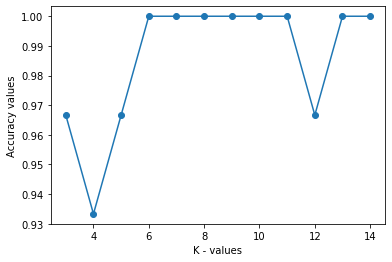

In [68]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [69]:
# here we can high accuracy values are for k=6,8,10,11,13,14, so we can go with one of them
#we can build a model with k-value=8

classifier=knn(n_neighbors=8,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [70]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

## Model 3: SVM
### Model 3.1: Linear SVM

In [71]:
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.9666666666666667
Precision score is: 0.9696969696969696
Recall score is: 0.9666666666666667
f1 score is: 0.9663492063492065


In [72]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

### Model 3.2: Polynomial SVM

In [75]:
##1 miss classification present in this model

In [77]:
svm_linear=SVC(kernel='poly')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.9666666666666667
Precision score is: 0.9696969696969696
Recall score is: 0.9666666666666667
f1 score is: 0.9663492063492065


In [78]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [33]:
##1 miss classification present in this model

## Model 3.3: Radial Basis Function SVM

In [79]:
svm_linear=SVC(kernel='rbf')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.9666666666666667
Precision score is: 0.9703703703703703
Recall score is: 0.9666666666666667
f1 score is: 0.9667698658410733


In [80]:
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [81]:
##1 miss classification present in this model

## 4.Decision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy score is: 0.9333333333333333
Precision score is: 0.9333333333333333
Recall score is: 0.9333333333333333
f1 score is: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [83]:
##1 miss classification present in this model

## 5.Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy score is: 0.9333333333333333
Precision score is: 0.9333333333333333
Recall score is: 0.9333333333333333
f1 score is: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [85]:
##1 miss classification present in this model

In [86]:
# Verifying feature importance to reduce anu un-important features

pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

# But iy seems that all the features are important

PW    49.128393
PL    38.375779
SL    10.514770
SW     1.981058
dtype: float64

In [87]:
# fine tuning some hyper parameters of random forest
rft=RandomForestClassifier(n_estimators=400,max_depth=10,random_state=2,criterion='entropy')

rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))

Accuracy score is: 0.9333333333333333
Precision score is: 0.9333333333333333
Recall score is: 0.9333333333333333
f1 score is: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



## Model 6: Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()

gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))

Accuracy score is: 0.9333333333333333
Precision score is: 0.9333333333333333
Recall score is: 0.9333333333333333
f1 score is: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



**Insight:**

|Model|F1-score|Accuracy|No. of misclassification|
|-|-|-|-|
|Logistic Regression|0.93|0.93|2|
|k-NN|1|1|0|
|Linear SVM|0.96|0.96|1|
|Polynomial SVM|0.96|0.96|1|
|RBF SVM|0.96|0.96|1|
|Decision Tree|0.93|0.93|2|
|Random Forest|0.93|0.93|2|
|Gradient Boosting|0.93|0.93|2|


* from this we can finalize k-NN model as best model.